In [1]:
import os
import time
import copy
import pickle
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS, SpectralEmbedding
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

In [2]:
import pacmap
from ppo import gauss_clusters

<Figure size 6000x6000 with 0 Axes>

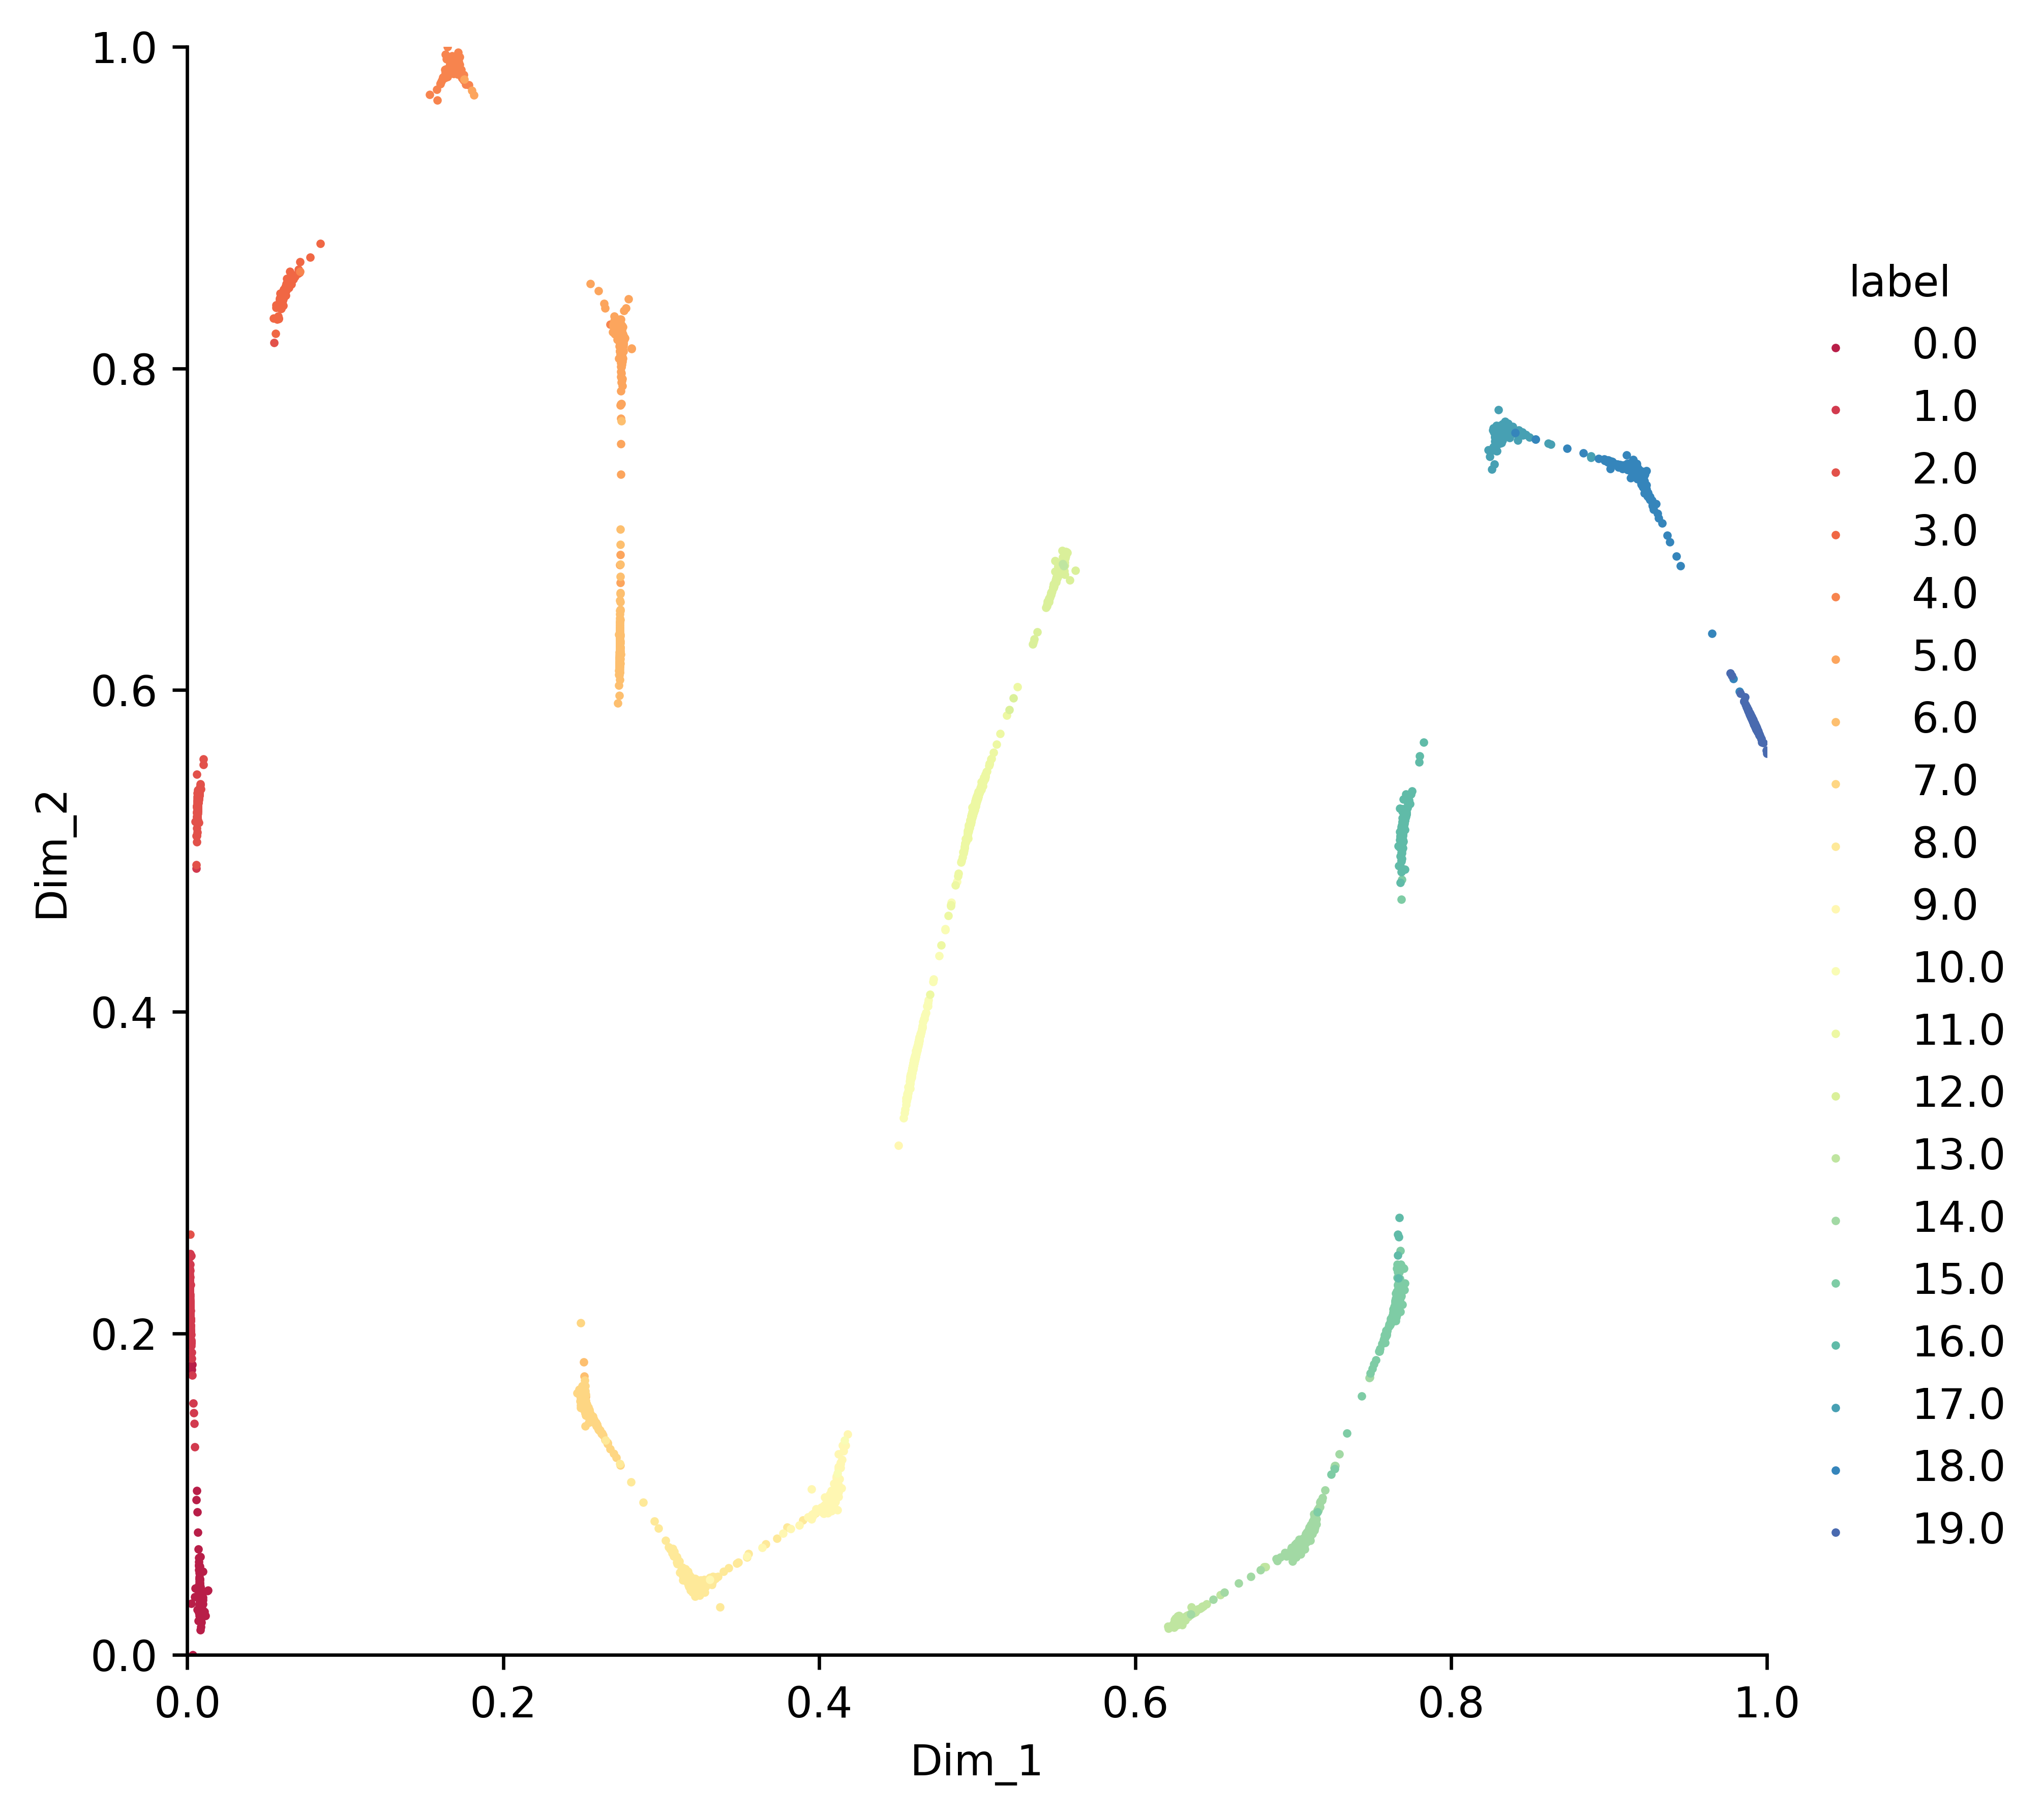

In [43]:
data, labels = gauss_clusters(
    n_clusters=20,
    dim=50,
    pts_cluster=1000,
    stepsize=6,
    random_state=None,
)
# idx = np.random.choice(data.shape[0], 1000, replace=False)
# data, labels = data[idx], labels[idx]

N = data.shape[0]
pcm = pacmap.PaCMAP(n_components=2, n_neighbors=15, MN_ratio=0.5, FP_ratio=1.0)
z = pcm.fit_transform(data.reshape(N,-1), init="pca")

%matplotlib inline
draw_z(z=normalise(z), cls=labels, s=1)

In [44]:
z = normalise(z)

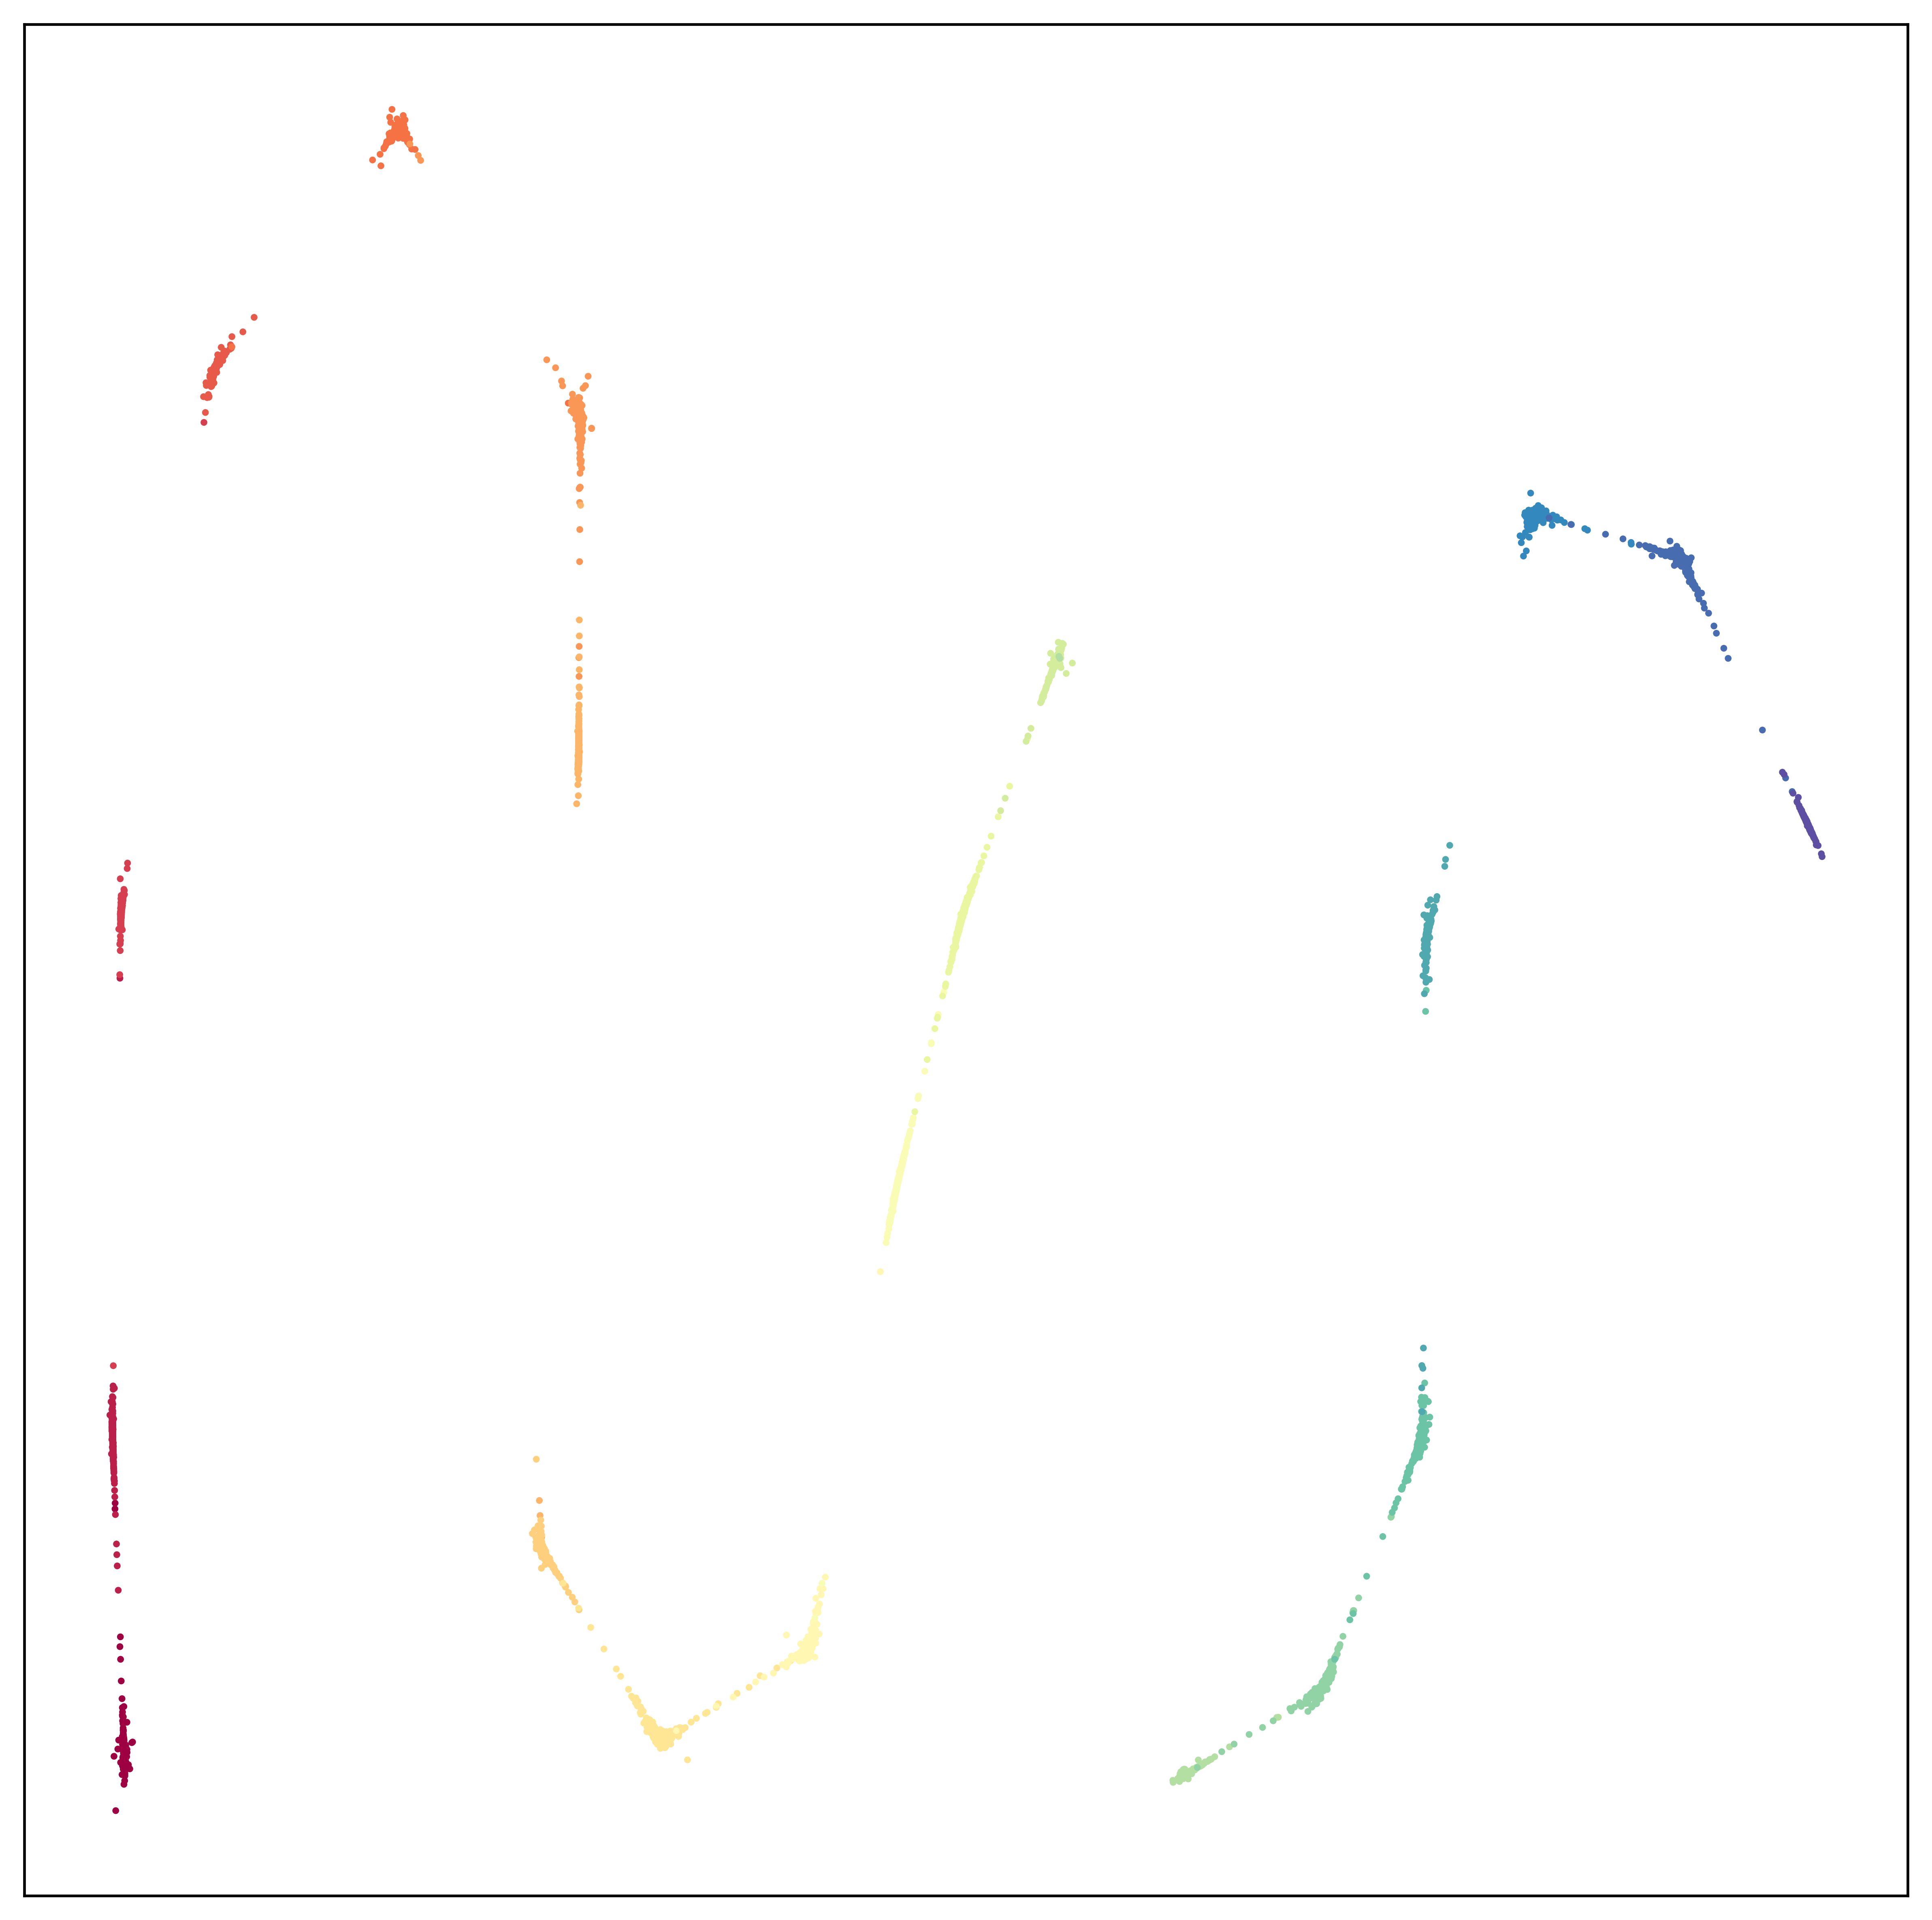

In [45]:
# idx = np.random.choice(z.shape[0], 1000, replace=False)
# z = z[idx]

plt.figure(figsize=(10,10), dpi=600)
plt.scatter(z[:,0], z[:,1], cmap="Spectral", c=labels, s=1)
plt.xticks([], linewidth = 10)
plt.yticks([], linewidth = 10)
plt.show()

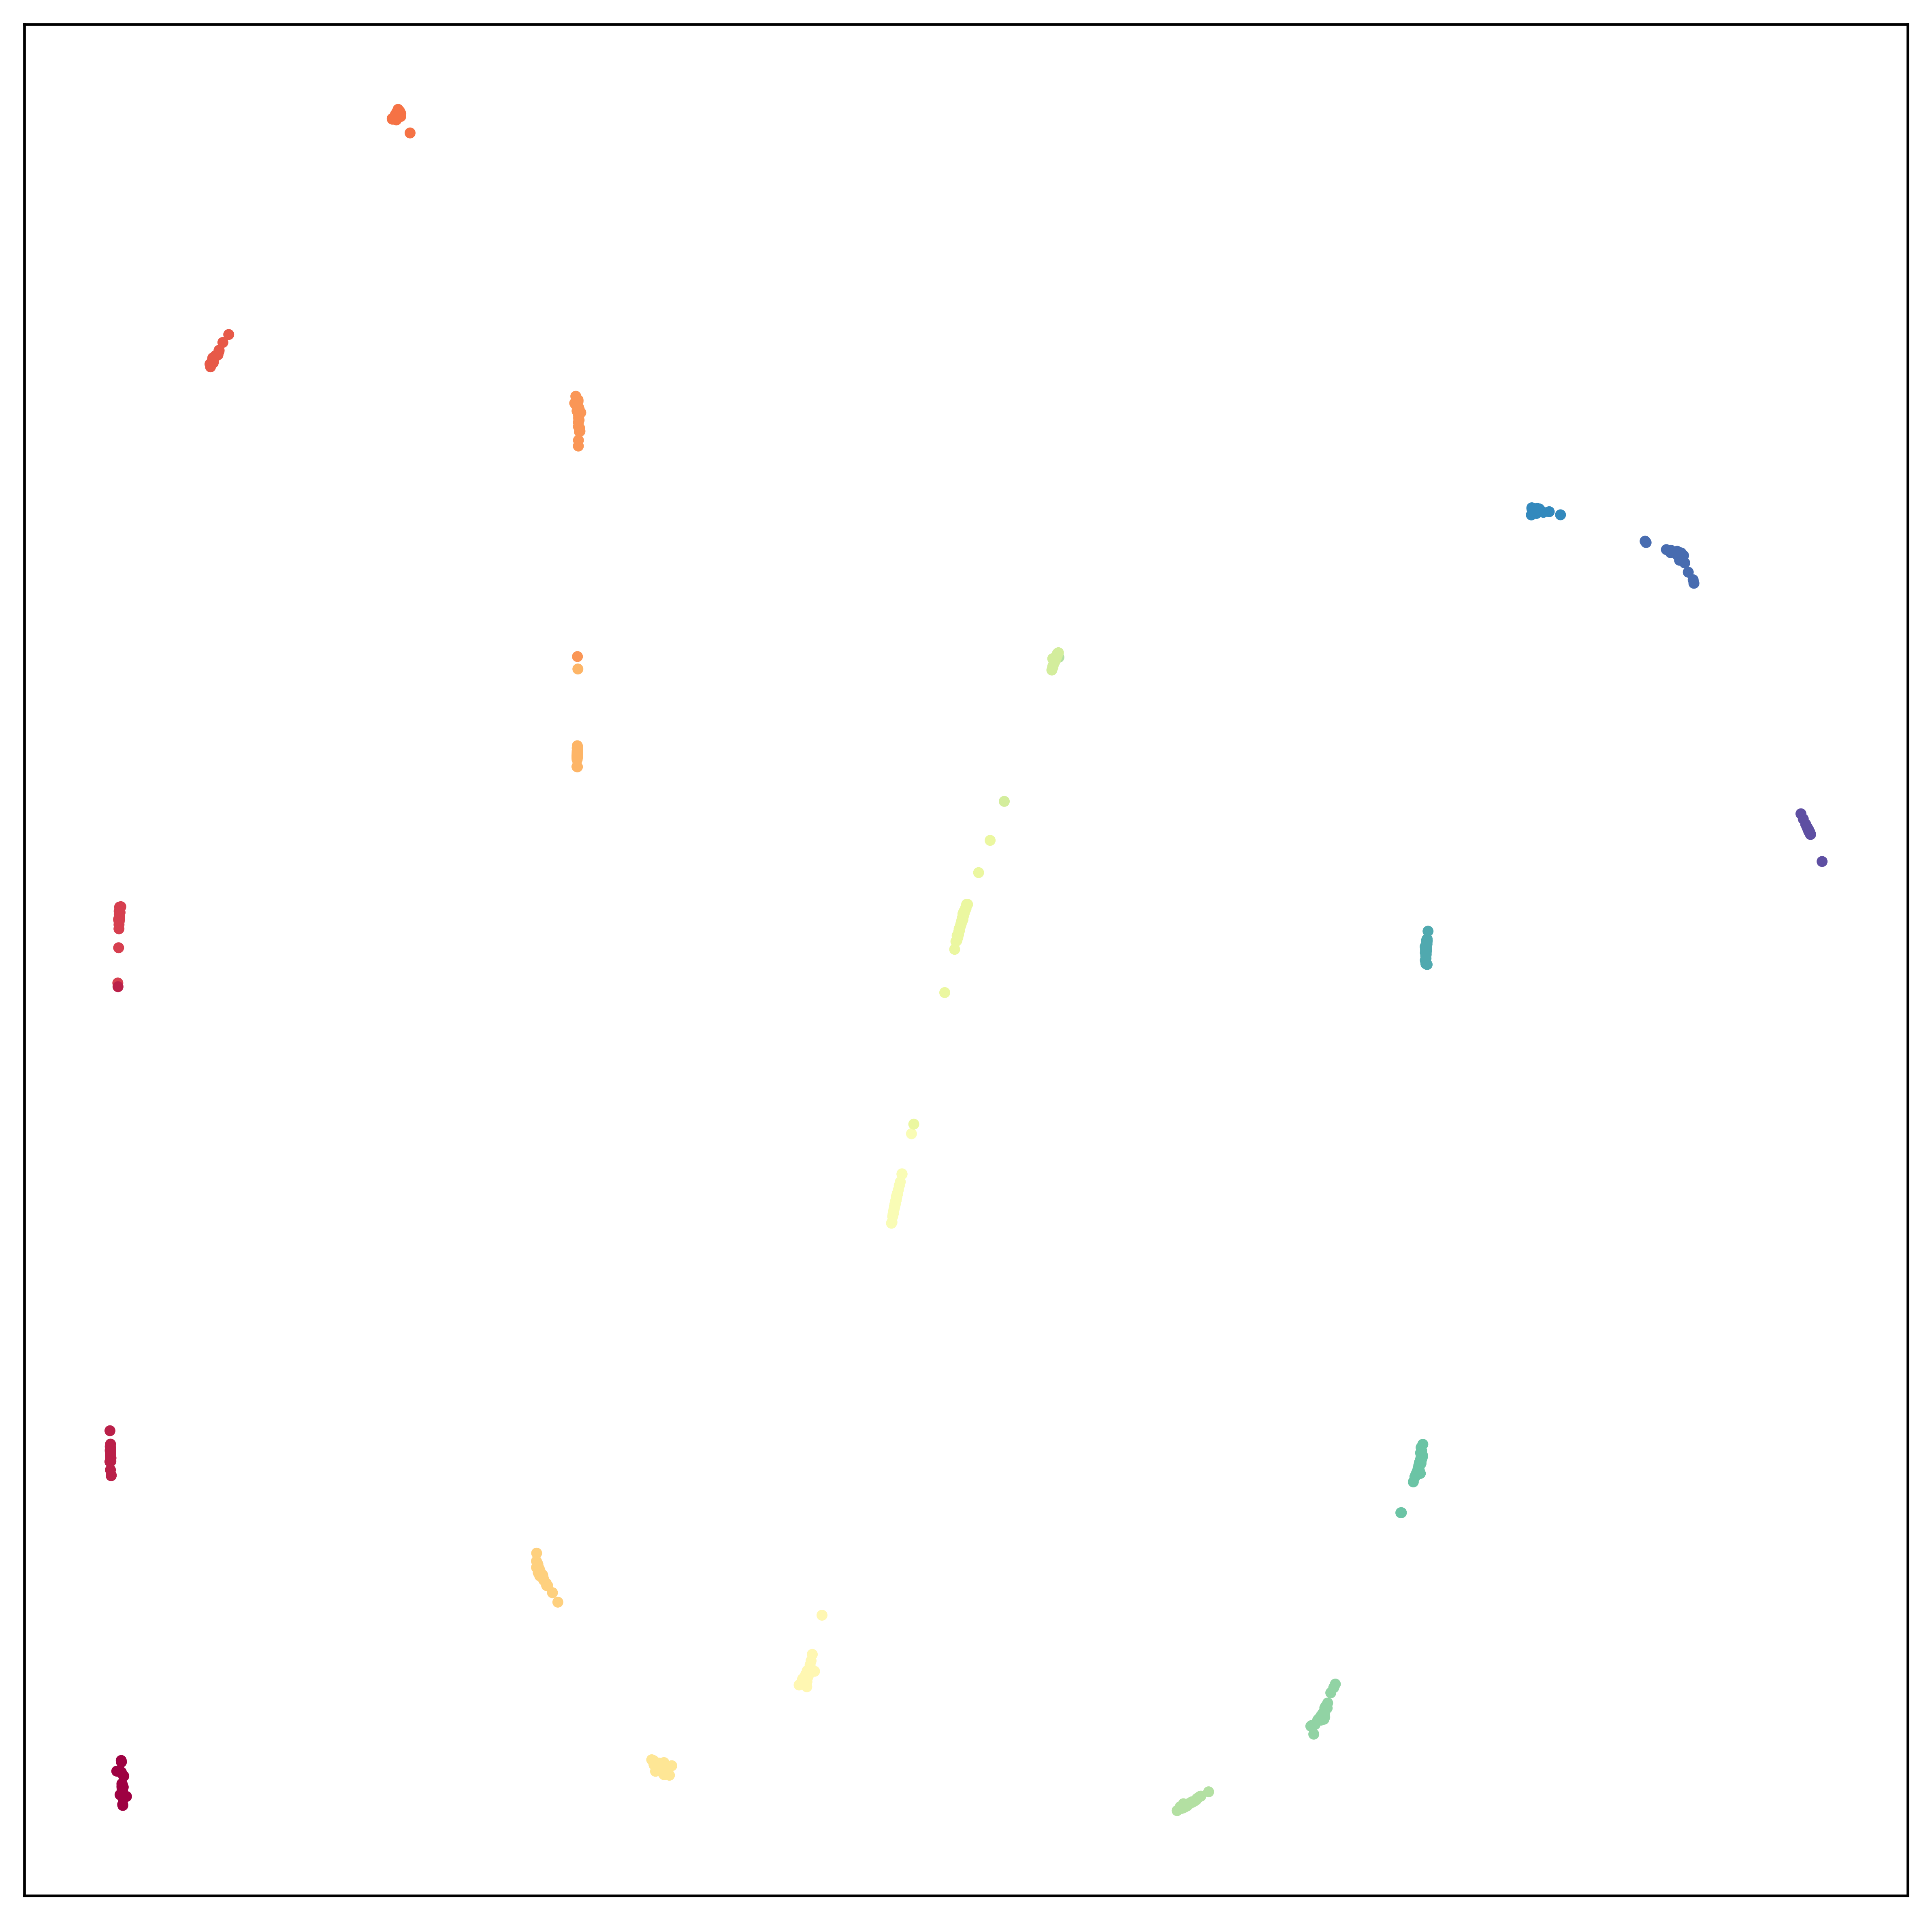

In [46]:
idx = np.random.choice(z.shape[0], 1000, replace=False)

plt.figure(figsize=(10,10), dpi=600)
plt.scatter(z[idx][:,0], z[idx][:,1], cmap="Spectral", c=labels[idx], s=5)
plt.xticks([], linewidth = 10)
plt.yticks([], linewidth = 10)
plt.show()

<Figure size 6000x6000 with 0 Axes>

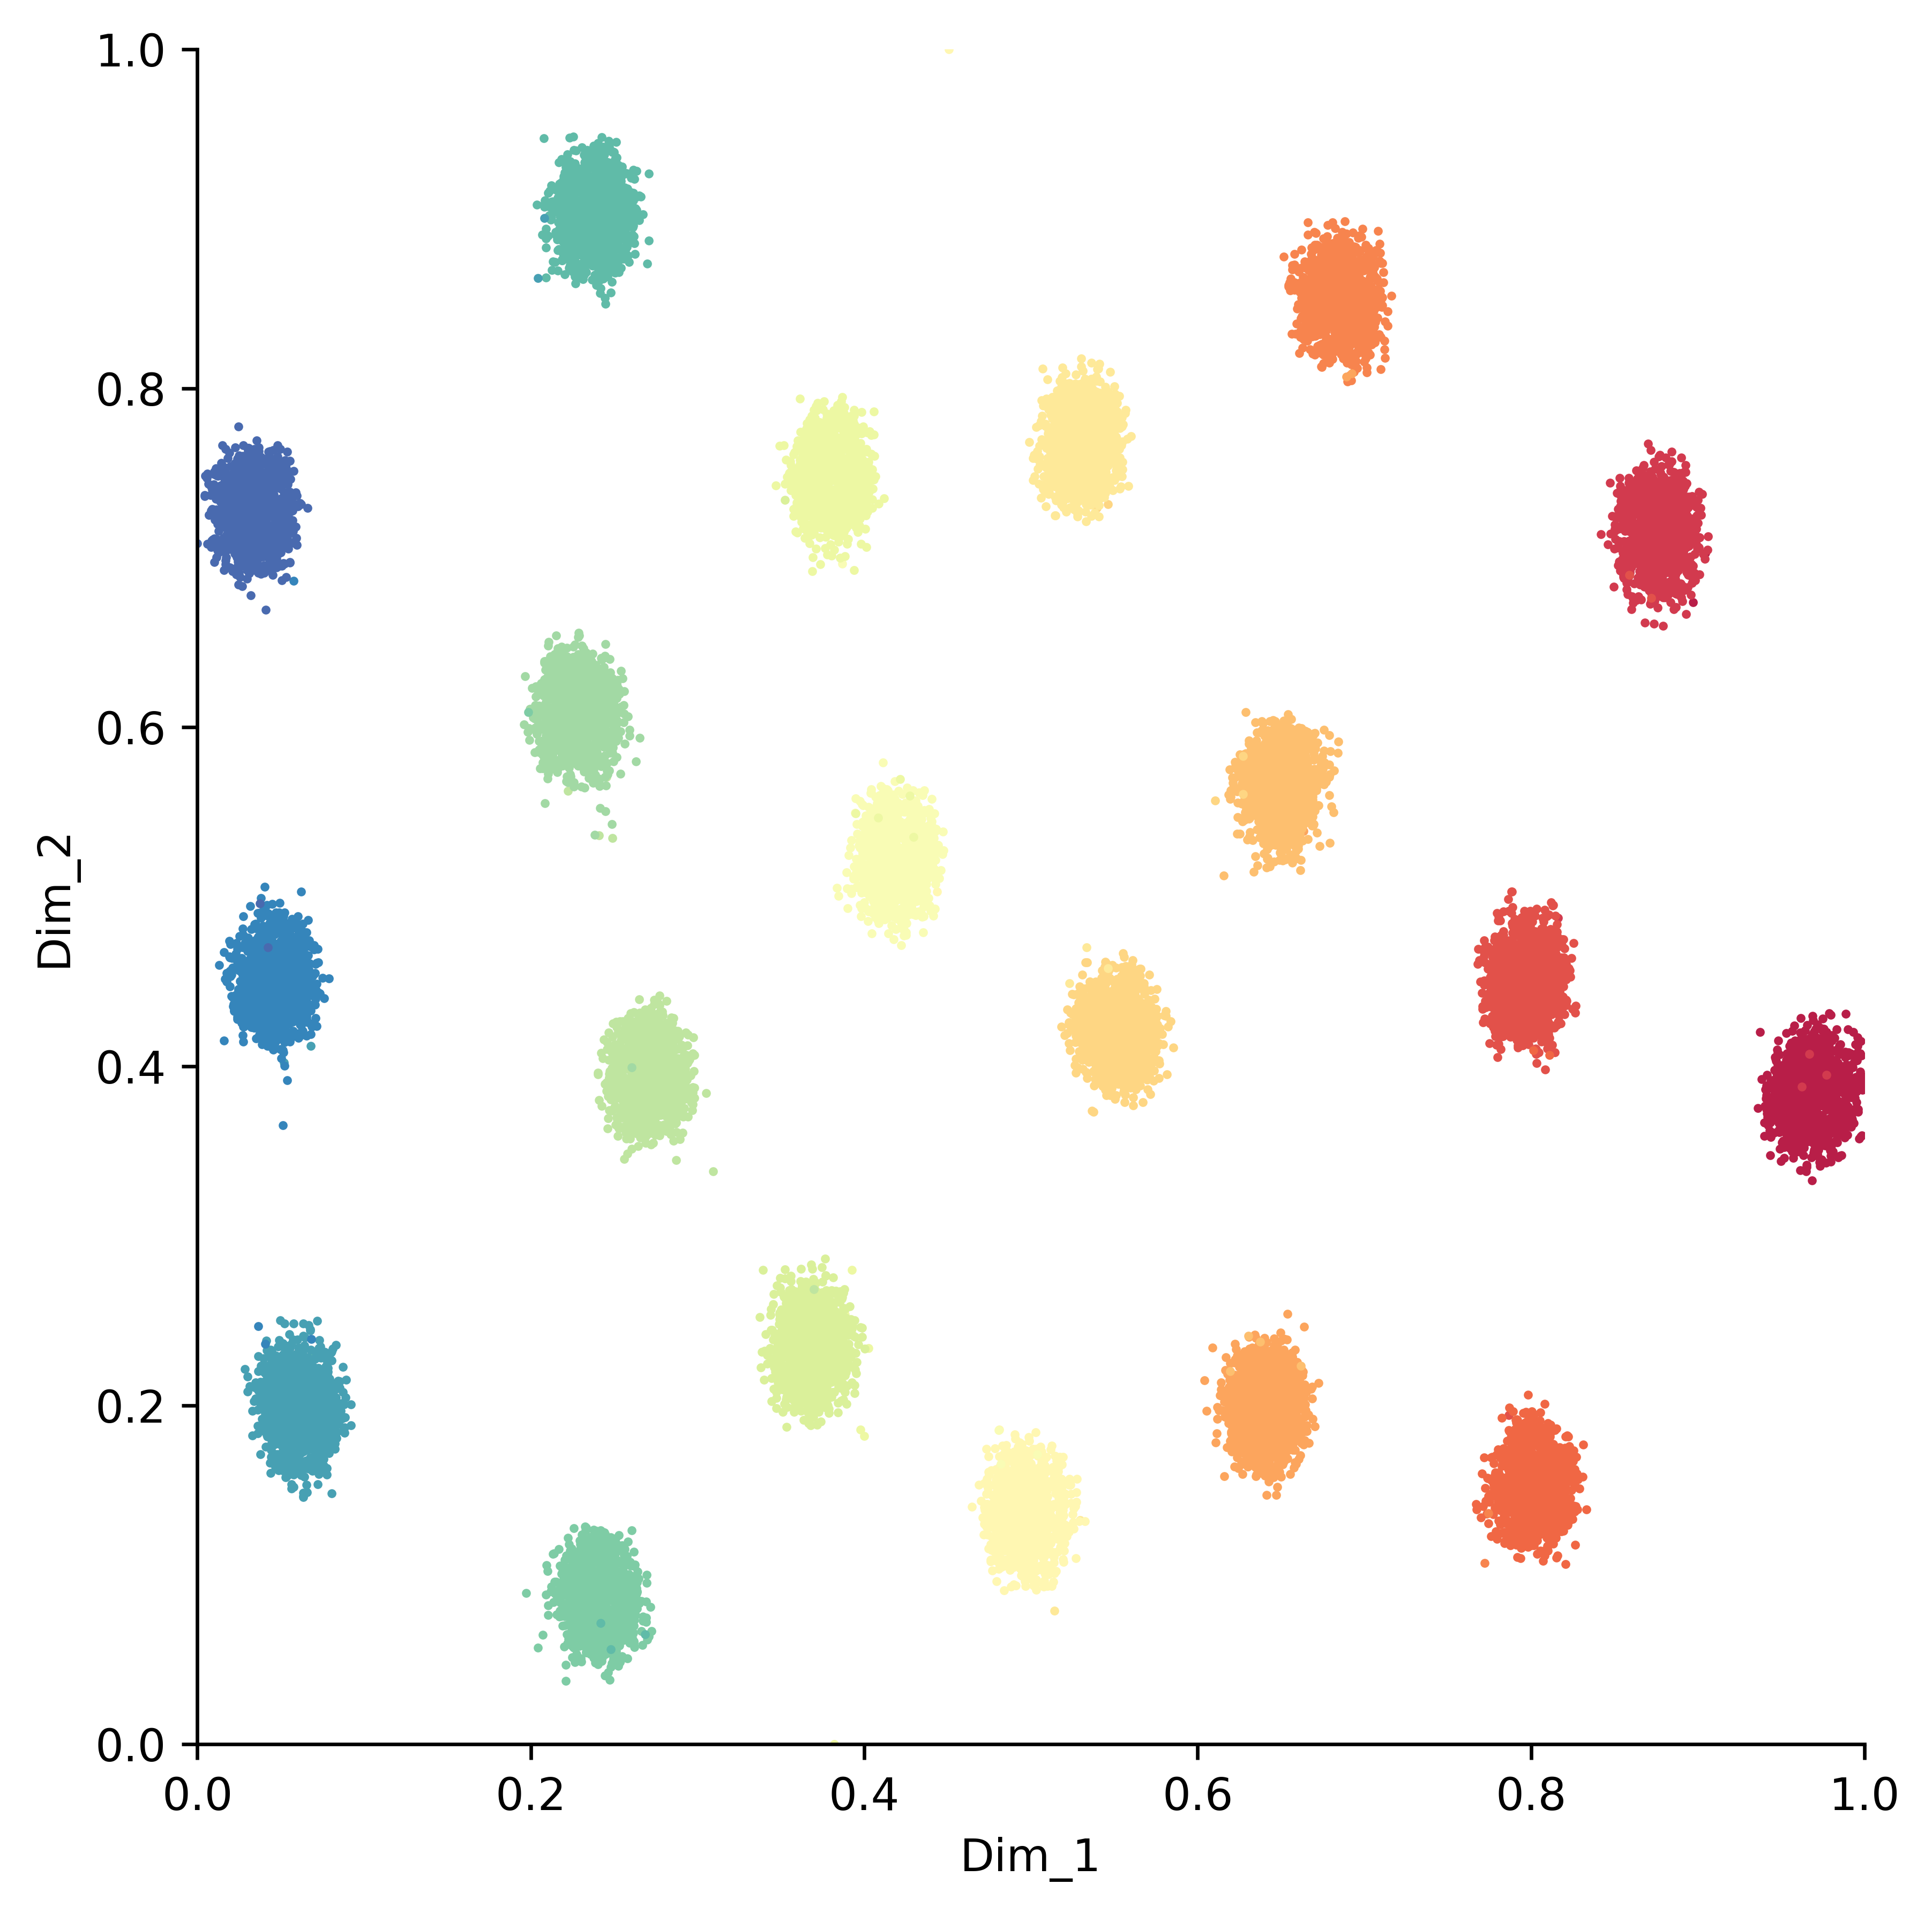

In [7]:
def my_draw_z(z, cls, s=25, x_highlight=None, y_highlight=None, save_path=None, display=True, title=None, palette="Spectral", dpi=600):
    # re-organise as df
    try:
        tsne_data = np.hstack((z.numpy(), cls.reshape((-1,1)).numpy()))
    except:
        tsne_data = np.hstack((z, cls.reshape((-1,1))))

    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    tsne_df = tsne_df.sort_values("label")

    # draw
    plt.figure(figsize=(10, 10), dpi=dpi)
    
    # main figure
    sn.FacetGrid(tsne_df, hue="label", height=6, palette=palette).map(plt.scatter, "Dim_1", "Dim_2", s=s)#.add_legend()
    # highlights
    if x_highlight!=None and y_highlight!=None:
        plt.scatter(x_highlight, y_highlight, marker='*', s=20, c='black', label='Highlighted Point')

    # dpi    
    matplotlib.rcParams["figure.dpi"] = dpi
    
    # axes range
    plt.xlim((0, 1))
    plt.ylim((0, 1))

    if title!=None:
        plt.title(title)
    
    if save_path!=None:
        plt.savefig(save_path, bbox_inches='tight')    

    if display==True:
        plt.show()
    else:
        plt.ioff()
        plt.clf()
        plt.close()

%matplotlib inline
my_draw_z(z=normalise(z), cls=labels, s=1)

<Figure size 6000x6000 with 0 Axes>

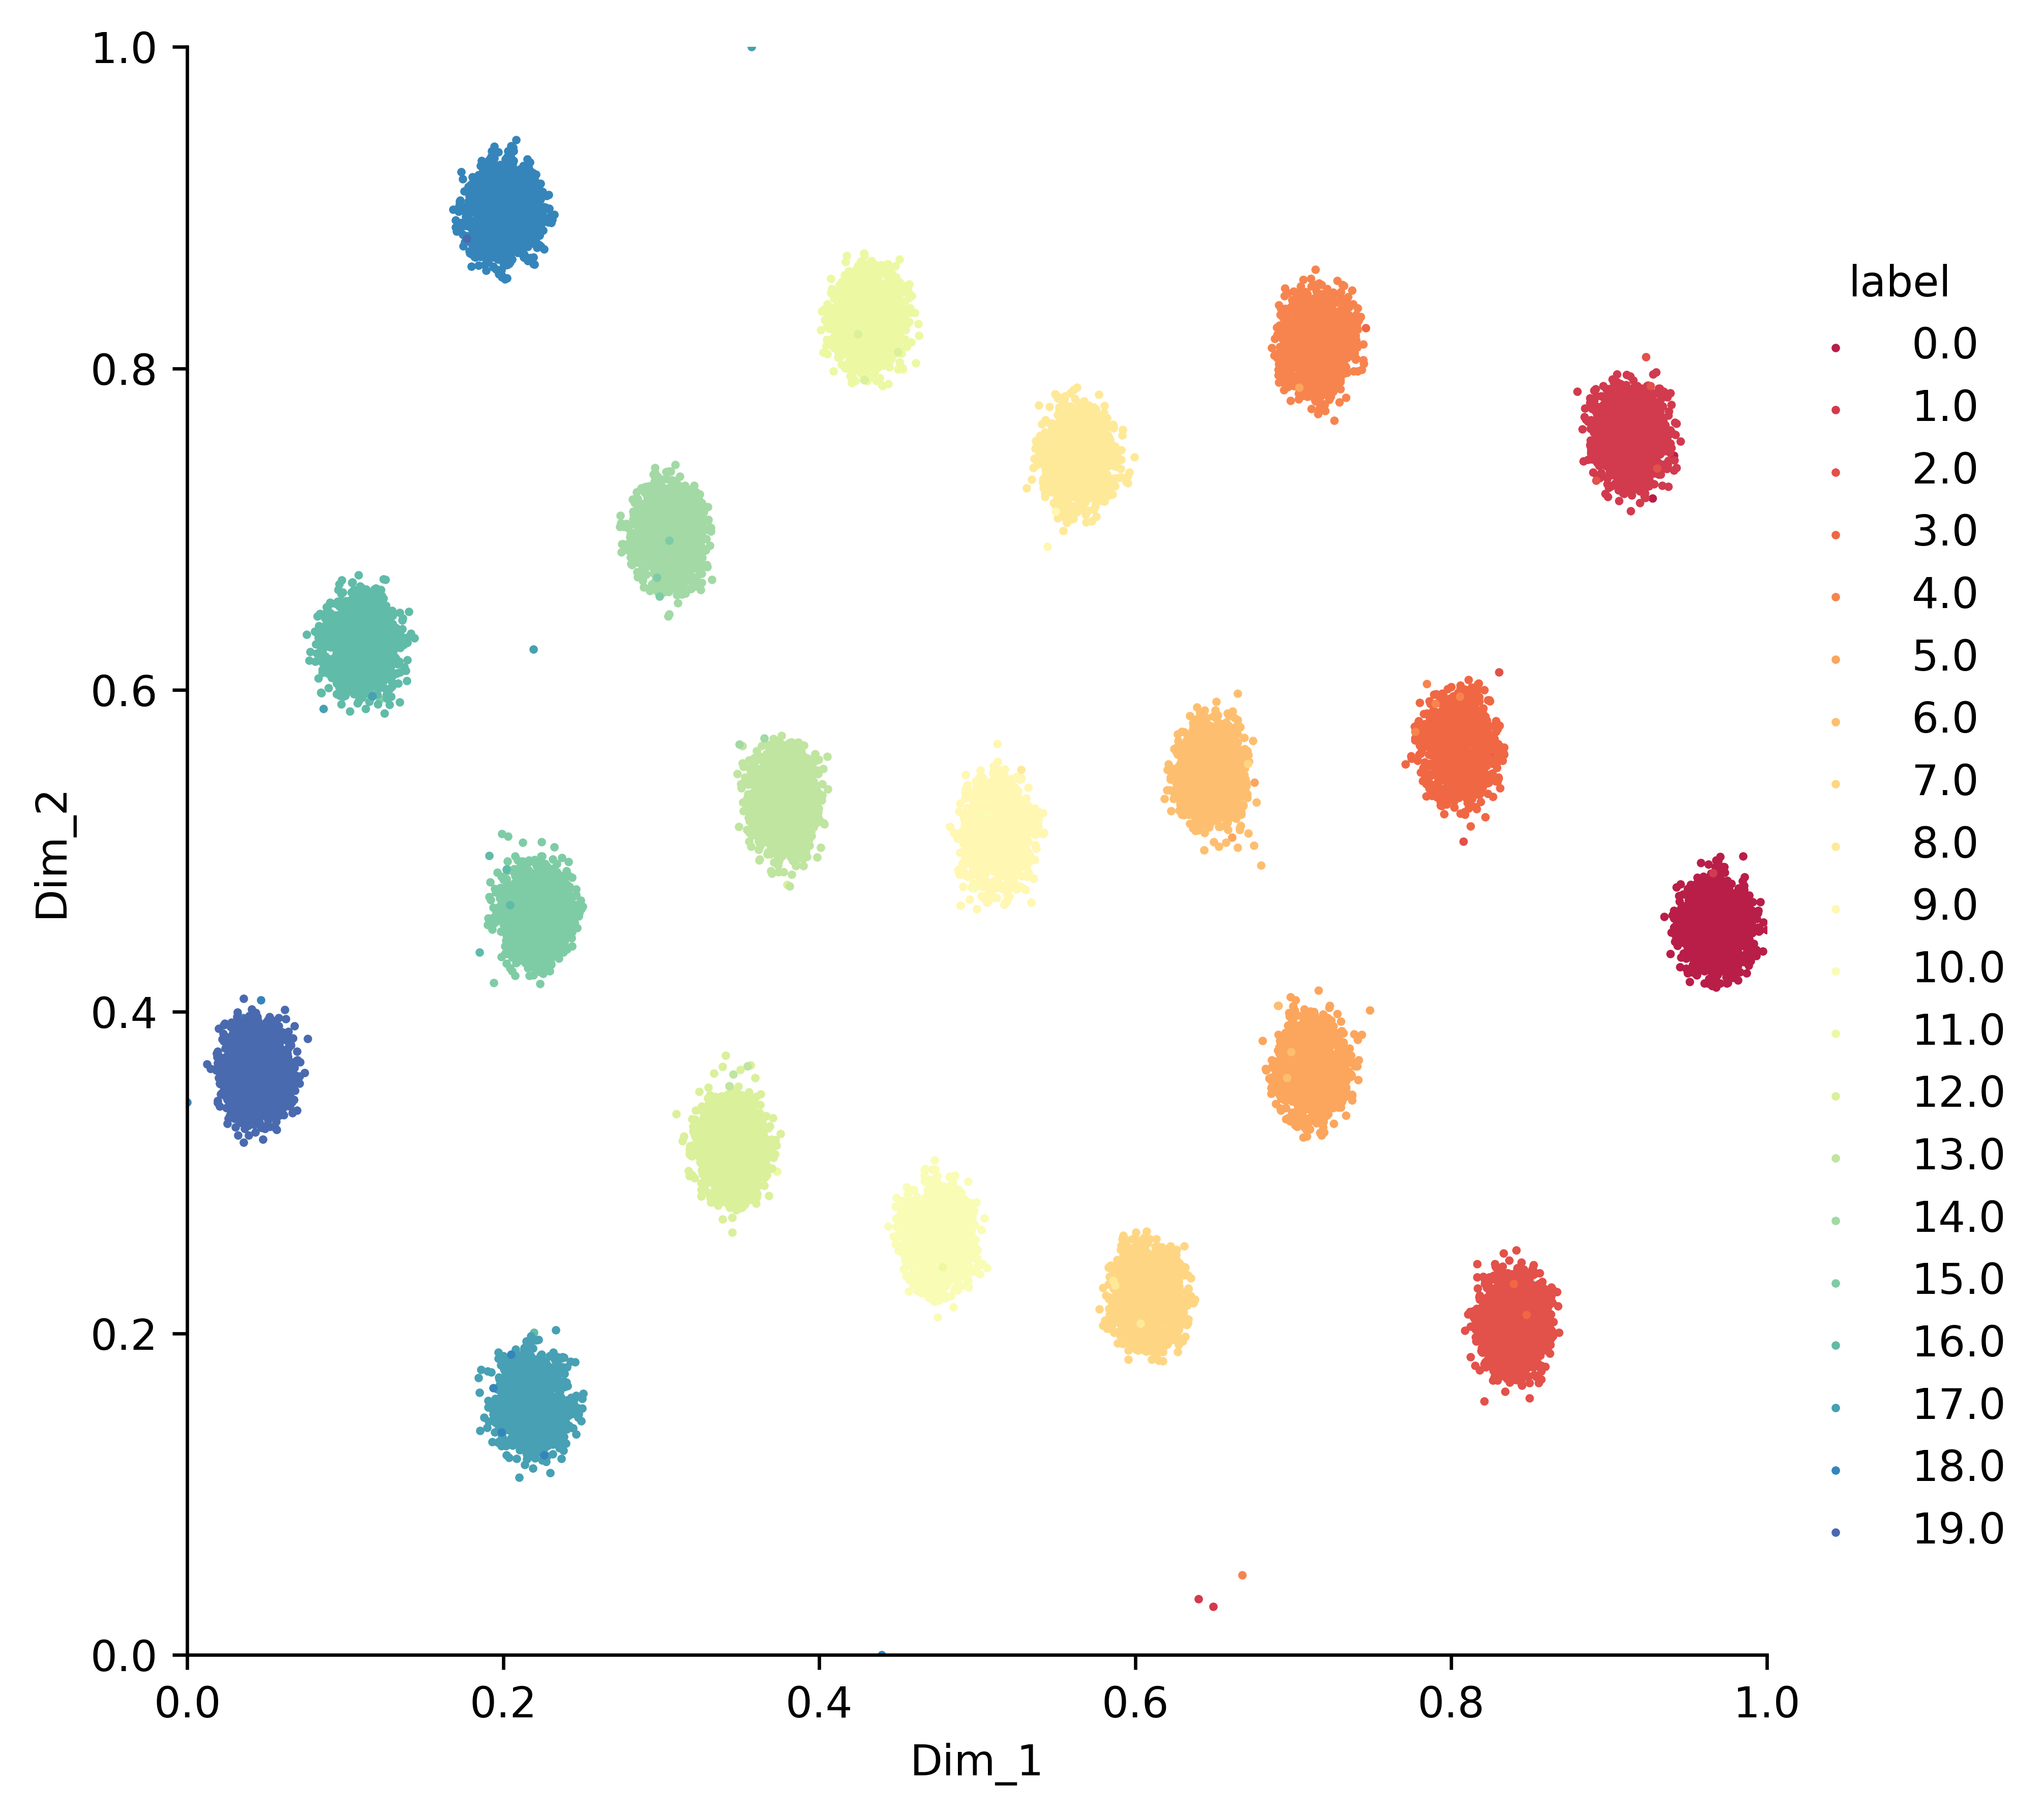

In [8]:
draw_z(z=normalise(z), cls=labels, s=1)

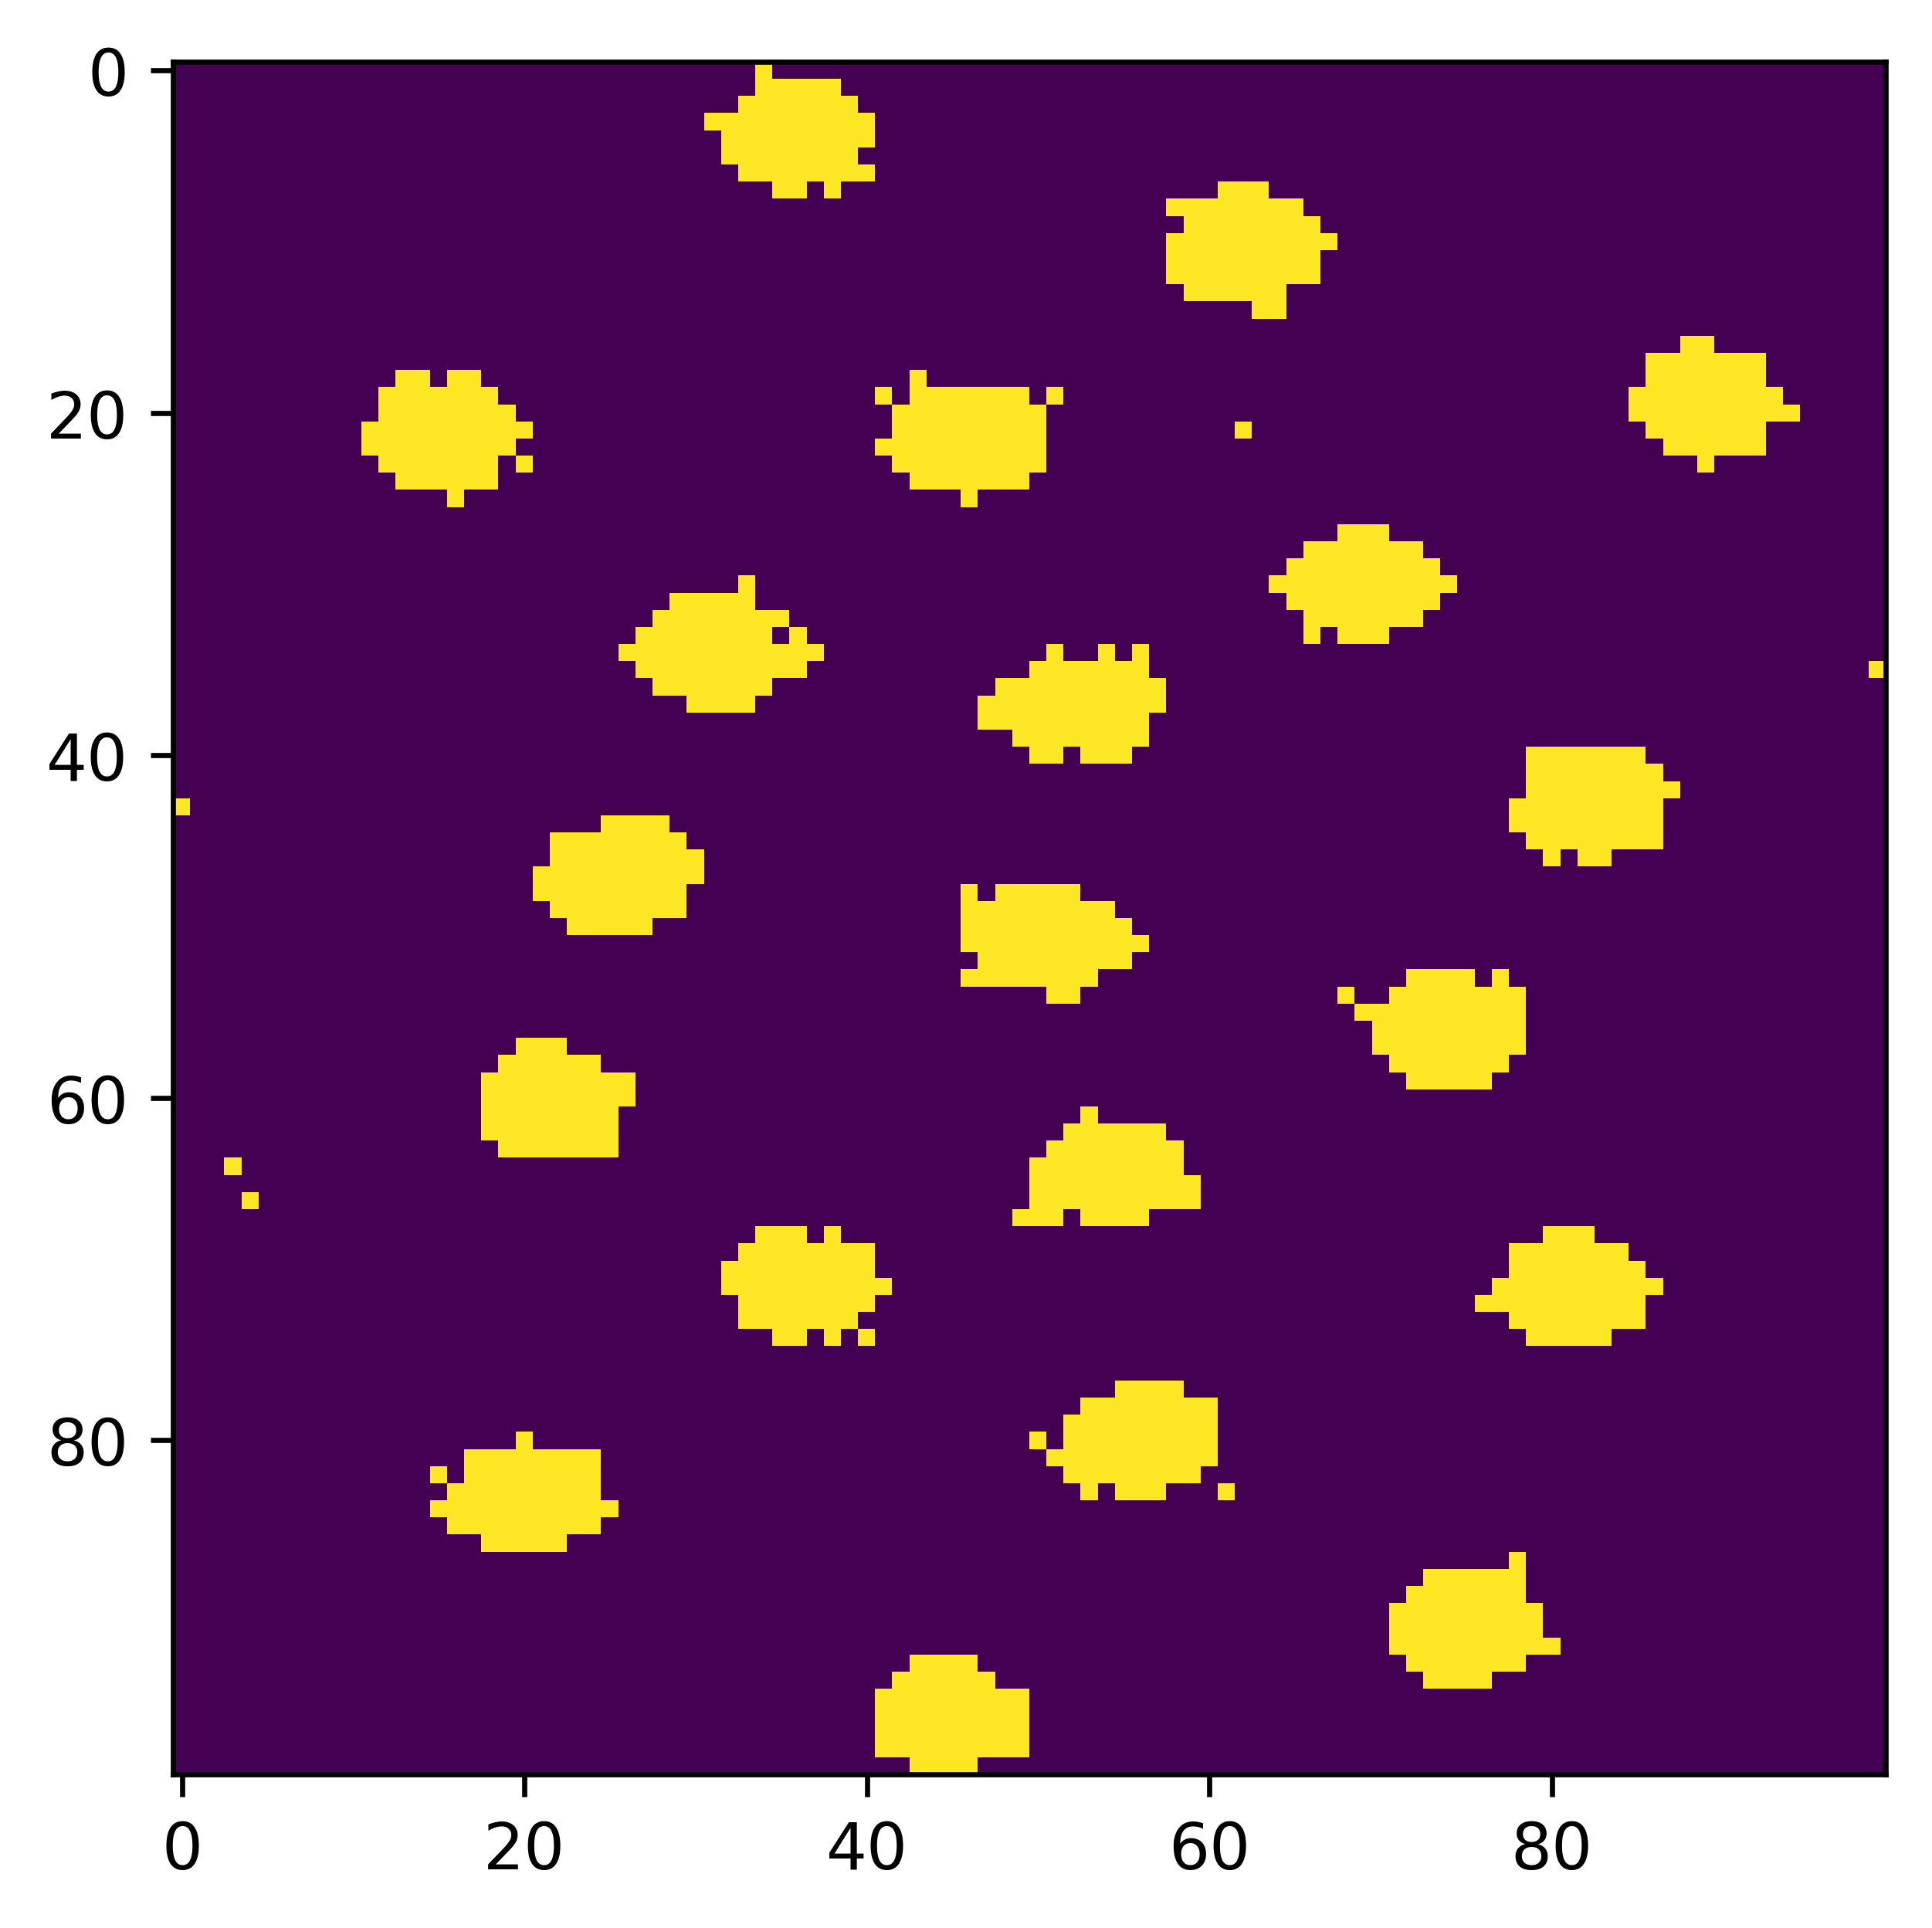

In [7]:
z_hat = get_Ihat(normalise(z), 100)
plt.imshow(z_hat)